<a href="https://colab.research.google.com/github/sudealan/Medical-Appointment-No-Show-Prediction/blob/main/CS210_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
from google.colab import drive
drive.mount("./drive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

%matplotlib inline

Mounted at ./drive


In [ ]:
fname = "KaggleV2-May-2016.csv"
path_prefix = './drive/My Drive' # Change Here with the correct path
df = pd.read_csv(join(path_prefix, fname))


# Missing Values

In [ ]:
# Counting the number of missing values in each column
missing_value_counts = df.isnull().sum()
# Printing the numbers counted
print(missing_value_counts)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


# Duplicates & Unique Values

In [ ]:
num_rows = df.shape[0]
df = df.drop_duplicates()

In [ ]:
for col in df.columns:
  print("Unique values for column ", col , ": ", df[col].unique(), "\n", sep= "")

Unique values for column PatientId: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]

Unique values for column AppointmentID: [5642903 5642503 5642549 ... 5630692 5630323 5629448]

Unique values for column Gender: ['F' 'M']

Unique values for column ScheduledDay: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']

Unique values for column AppointmentDay: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-0

# Outliers

Finding the 1st and 3rd quartile and then finding the upper and lower bounds according to that. Also, if the age's lower bound is lower than zero, updating it to 0.

In [ ]:
age = df['Age']
sorted(age)
q1, q3= np.percentile(age,[25,75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
if lower_bound < 0:
  lower_bound = 0

Updating the dataset with deleting the outliers

In [ ]:
df = df[(df['Age'] < upper_bound) & (df['Age'] > lower_bound)]



# Visualization

**Why is Visualization important for the data?**

In this section, data visualization, one of the most important parts of Exploratory Data Analysis (EDA), will be implemented. In addition, the "Medical Appointment No Shows" database will be analyzed and explained further.

In data visualization, it is aimed to decipher the "Medical No Shows" through the graphics obtained from the main heading columns in the dataframe and to present the material that will support the understanding of the relationship between them. In other words, it will reduce crowded data sets to intensive graphics and offer the opportunity to analyze and make inferences for the human eye.



**What is the demographic structure that forms the data?**

First of all, the demographic elements in the database will be analyzed. Age and gender distribution in the available "Medical Appointment No Shows" data will be examined. Based on this examination, various analyzes and inferences will be conducted according to the age and gender distribution of the data.

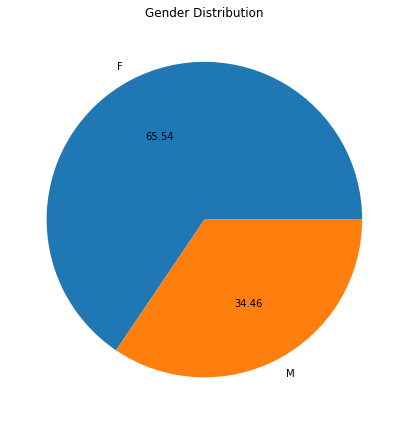

In [ ]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f',figsize=(10, 6),ylabel = "")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()


Taking the data in the gender distribution pie chart as reference, there is only male and female options in the data, and there is a female-male ratio of 65% to 35%.

Age, which is another demographic element, is a very important data for EDA. Due to the large age range in the data, certain age group ranges have been determined. These age groups are divided into babies, kids, adolescents, young adults, middle-aged adults and old-adults, respectively. The basis of these is the possibility of having a critical role in the interpretations and comparisons later in the project.

Age scale of age groups has been determined as follows:

- Babies [0-3] years
- Kids [4-13] years
- Adolescents [14-20] years
- Young adults [21-39] years
- Middle-aged adults [40-65] years
- Old adults [66-100] years

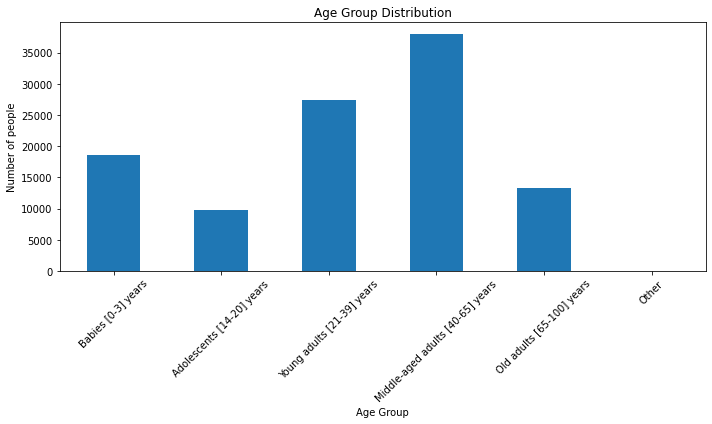

In [ ]:
age_list = list(df["Age"])
agegroup_list = []

counterX = 0

for age in age_list:
  age = float(age)
  if age >= 0 and age <= 3:
    agegroup_list.append("Babies [0-3] years")
  elif age >= 4 and age <= 13:
    agegroup_list.append("Babies [0-3] years")
  elif age >= 14 and age <= 20:
    agegroup_list.append("Adolescents [14-20] years")
  elif age >= 21 and age <= 39:
    agegroup_list.append("Young adults [21-39] years")
  elif age >= 40 and age <= 65:
    agegroup_list.append("Middle-aged adults [40-65] years")
  elif age >= 66  and age <= 100:
    agegroup_list.append("Old adults [65-100] years")
  else:
    agegroup_list.append("Other")

df['Age_Group'] = np.array(agegroup_list)
df['Age_Group'] = pd.Categorical(df['Age_Group'], ["Babies [0-3] years", "Adolescents [14-20] years"
,"Young adults [21-39] years","Middle-aged adults [40-65] years", "Old adults [65-100] years" ,"Other"])
df.groupby('Age_Group').size().plot(kind='bar',figsize=(10, 6),ylabel = "Number of people", xlabel= "Age Group")
plt.title("Age Group Distribution")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


The Age Group ratios given above prove that the data is mostly generated by young and middle-aged adults. It is foreseen to provide support in determining the criteria that cause the formation of "Medical Appointment No Show", which constitutes the target of our project, by grouping different ages as in the graphic above.

**What is the situation with the "No-shows" on medical appointments?**

The main characteristic of our data is the "No-Show" data itself. This characteristic, which has a binary feature, is reflected in the data.

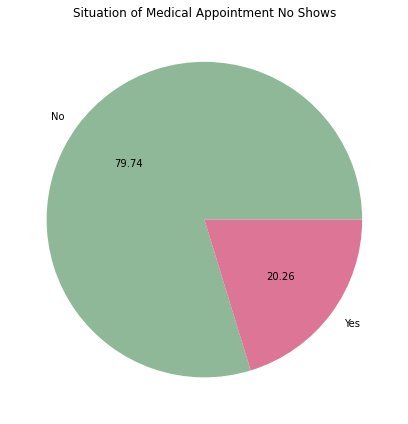

In [ ]:
colors = ['#8EB897', '#DD7596']
df.groupby('No-show').size().plot(kind='pie', autopct='%.2f',figsize=(10, 6),ylabel = "", colors=colors)
plt.title("Situation of Medical Appointment No Shows")
plt.tight_layout()
plt.show()

The "No-show" characteristic itself, which constitutes the aim of the project, claims that according to the data above, people miss their medical appointments by 30%. Since this rate has a substantial proportion, the effect of other characteristics in the data in creating this 30% rate will be presented with comparative stacked charts and correlation graphs.

**What is the relationship between "No-show"s and other characteristics?**

As stated before, selections will be made from the 14 characteristics in the data. These selections will help to find the elements that may lead to the emergence of "Medical Appointment No Show". These characteristics will be gender, age, scholarship, alcholism and "SMS received", respectively.

<Figure size 1440x1728 with 0 Axes>

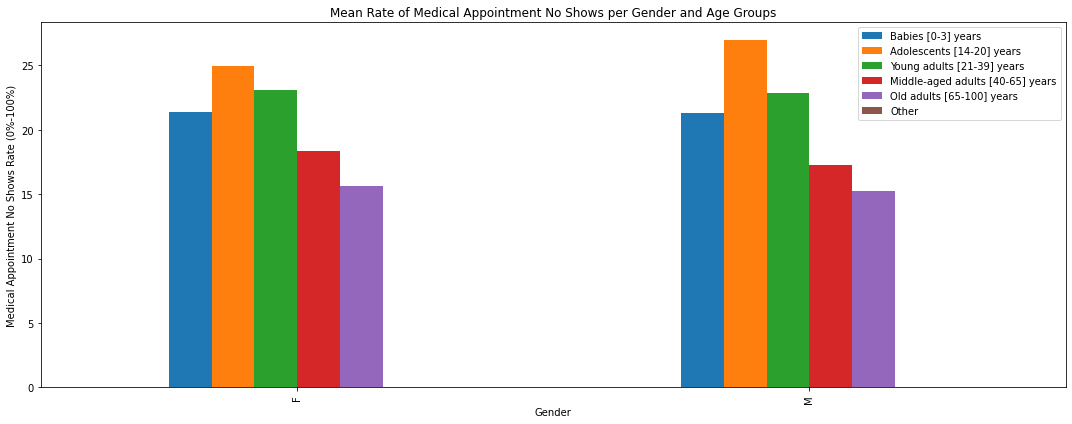

In [ ]:
noshow_list = list(df["No-show"])
noshow_binary_list = []

for noshow in noshow_list:
  if noshow == "Yes":
    noshow_binary_list.append(1)
  else:
    noshow_binary_list.append(0)

df['No-show_Binary'] = np.array(noshow_binary_list)

noshows_age_gender = df.groupby(['Gender', 'Age_Group']).mean()['No-show_Binary'].unstack()*100

plt.figure(figsize=(20,24))

noshows_age_gender.plot(ylabel = "Medical Appointment No Shows Rate (0%-100%)", kind="bar", figsize=(15, 6))
plt.title("Mean Rate of Medical Appointment No Shows per Gender and Age Groups")
plt.tight_layout()
plt.legend(loc=1)
plt.show()


First of all, the chart above shows the "Medical Appointment No-Show" rates by gender and age groups. This ratio is created from a binary data in the data, and the rate indicates the ratio from 0% to 100%.

When the chart is analyzed, it can be observed that the average no-show rate of the first striking factor is very similar in age groups of both genders and creates the same pattern. This means that it is argued that the gender distribution is not much effective in determining the no-show factors, which is one of the aimed characteristics of the project.

<Figure size 720x432 with 0 Axes>

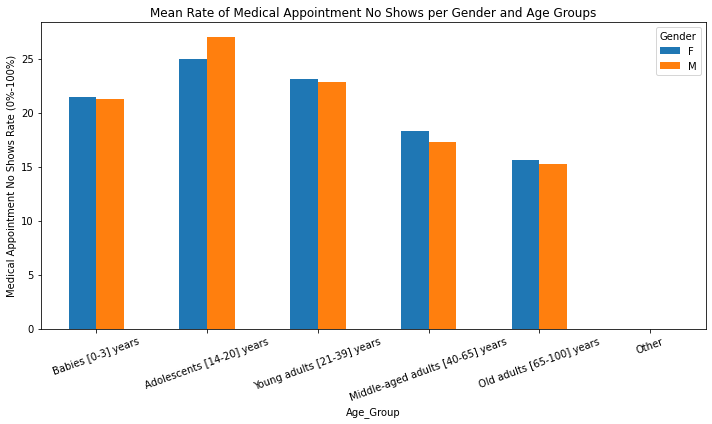

In [ ]:
noshows_age_gender = df.groupby(['Age_Group', 'Gender']).mean()['No-show_Binary'].unstack()*100

plt.figure(figsize=(10,6))

noshows_age_gender.plot(ylabel = "Medical Appointment No Shows Rate (0%-100%)", kind="bar", figsize=(10, 6))
plt.title("Mean Rate of Medical Appointment No Shows per Gender and Age Groups")
plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()

Moreover, when this chart is examined, it is observed that there are differences in the "Medical appointment no-show" rates of age groups, which is another demographic characteristic. Although this difference is not very large, it is seen that adolescents aged 13-20 do not go to their medical appointments at a higher rate. On the other hand, it is observed that older adults who make up the 66-100 age range do not go at a lower rate. Based on these two comparisons, there is a small possibility that age groups have a role in determining "no-shows".

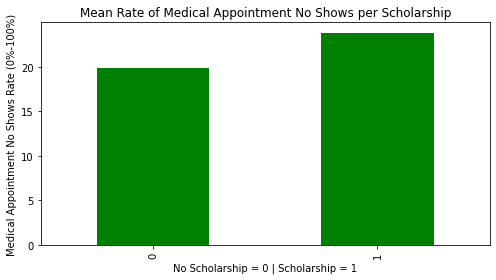

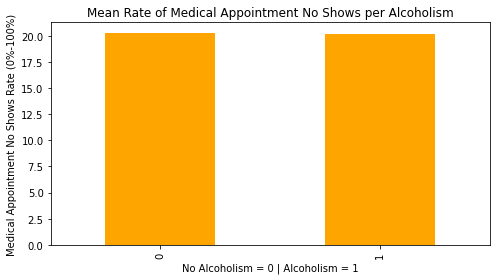

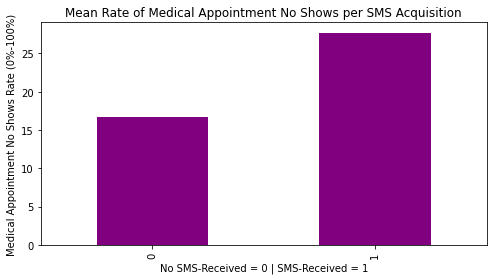

In [ ]:
df2 = df[['Scholarship', 'Alcoholism', 'SMS_received','No-show_Binary']].copy()

barchart1 = df2.groupby(['Scholarship']).mean()['No-show_Binary']*100
barchart1.plot(ylabel = "Medical Appointment No Shows Rate (0%-100%)",xlabel = "No Scholarship = 0 | Scholarship = 1", kind="bar", figsize=(7, 4),color="Green")
plt.title("Mean Rate of Medical Appointment No Shows per Scholarship")
plt.tight_layout()
plt.show()

barchart2 = df2.groupby(['Alcoholism']).mean()['No-show_Binary']*100
barchart2.plot(ylabel = "Medical Appointment No Shows Rate (0%-100%)",xlabel = "No Alcoholism = 0 | Alcoholism = 1", kind="bar", figsize=(7, 4),color="Orange")
plt.title("Mean Rate of Medical Appointment No Shows per Alcoholism")
plt.tight_layout()
plt.show()

barchart3 = df2.groupby(['SMS_received']).mean()['No-show_Binary']*100
barchart3.plot(ylabel = "Medical Appointment No Shows Rate (0%-100%)",xlabel = "No SMS-Received = 0 | SMS-Received = 1", kind="bar", figsize=(7, 4),color="Purple")
plt.title("Mean Rate of Medical Appointment No Shows per SMS Acquisition")
plt.tight_layout()
plt.show()


There are some differences when the above three charts are analyzed.

Firstly, there is a slight difference in scholarship status. To briefly explain what the scholarship feature of the data means; The Brazilian government offers scholarships to low-income families if their children attend school and meet other special requirements. Some people think this scholarship has a political bias, but many believe it is an excellent way to help families. A small percentage of people who do not have a scholarship are more likely to attend medical appointments, thus suggesting the possibility that this characteristic may be effective in determining the root cause of the "no-show".

Secondly, it is observed that the effect of alcoholism shows almost no difference in determining the rates of medical appointments. Therefore, alcoholism will not be included in the focal characteristics in our project.

Finally, it was emphasized that there is a significant difference in participation in medical appointments, whether or not the persons included in the data receive SMS. Normally it is known that SMSs are sent as reminders, so this difference actually presents a surprising factor. The difference in SMS Acquisiton data can be interpreted in many ways. For example, the SMS reminder feature is generally available for people who miss medical appointments, and it can be interpreted that it is not needed for those who do not. Since the assumptions are not 100% correct, the aim of this project will be to determine the characteristic that increases the "medical appointment no show" rate the most.



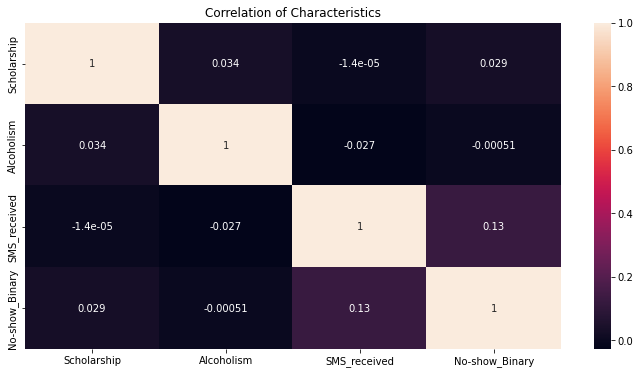

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Correlation of Characteristics', fontsize = 12)

sns.heatmap(df2.corr(), annot= True);




In the heat map given above, the correlation ratios between the characteristics in the "Medical Appointment No Show" data can be observed. In addition, it is observed that the biggest correlation is again in SMS Acqusition. It can be said that the SMS Acqusition characteristic is effective in increasing the number of "no-shows" by referring to this factor presented to us by the visualization tools.



# Feature Engineering
PreviousApp: The number of previous appointments of each patient is found by calculating the cumulative sum of the PatientId's ordered by ScheduledDay column.
PreviousNoShow: The no show count of each patient was calculated and the value was divided by the patient's appointment count to determine no show to appointment count ratio of each patient

In [ ]:
from datetime import datetime
def get_day(x):
    return x.date()
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
df['Gender_F'] = (df['Gender'] == 'F')*1
df['NoShow'] = (df['No-show'] == 'Yes')*1
df['PreviousApp'] = df.sort_values(by = ['PatientId','ScheduledDay']).groupby(['PatientId']).cumcount()
df['PreviousNoShow'] = (df[df['PreviousApp'] > 0].sort_values(['PatientId', 'ScheduledDay']).groupby(['PatientId'])['NoShow'].cumsum() / df[df['PreviousApp'] > 0]['PreviousApp'])


DaysBeforeApp: The number of days between the day that the appoitment is scheduled and the actual day of the appointment are calculated. This column is a supportive column to calculate the ScheduledSameDay column.
ScheduledSameDay: If the appoinment was arranged for the same day it is being scheduled, this column's value is 0, otherwise 1. This column is created for the assumption that the no-show probability would be lower if the patient's avaliability of the day is determined.

In [ ]:
df['DaysBeforeApp'] = ((df.AppointmentDay.apply(get_day) - df.ScheduledDay.apply(get_day)).astype('timedelta64[D]')).astype(int)
rows, columns = df.shape
same_day= []
for i in range(rows):
  cell = df.iloc[i]['DaysBeforeApp']
  if cell == 0:
    same_day.append(1)
  else:
    same_day.append(0)
#if the appointment is made for the same day, the no-show may be less.
df['ScheduledSameDay'] = same_day


# Machine Learning


Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Age','Scholarship','Hipertension','Diabetes', 'Alcoholism','SMS_received',
            'PreviousApp', 'ScheduledSameDay', 'PreviousNoShow']
scaler = StandardScaler().fit(df[features])
df_rescaled = scaler.transform(df[features])


In [ ]:
#Logistic regression
from sklearn.model_selection import train_test_split

df = df.dropna()
# Split the data into features and target


y = df["NoShow"]

# Split the data into training and test sets
X_train, X_rem, y_train, y_rem = train_test_split(df[features],y,train_size=0.6,  stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,stratify = y_rem)


Hyperparameter tuning is done with GridSearchCv. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


param_grid = {'C': [0.1, 1, 10],
              'solver': ['lbfgs', 'liblinear', 'newton-cg']}

logreg = LogisticRegression(max_iter = 10000)


grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
y_pred = grid_search.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Test accuracy: {accuracy:.2f}')

{'C': 0.1, 'solver': 'liblinear'}
Test accuracy: 0.94


In [ ]:
# Make predictions on the test set
logreg = LogisticRegression(C=0.1,solver ='liblinear')
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

y_score = logreg.predict_proba(X_test)[:, 1]
auprc = average_precision_score(y_test, y_score)
auprc

0.9471246882868557

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


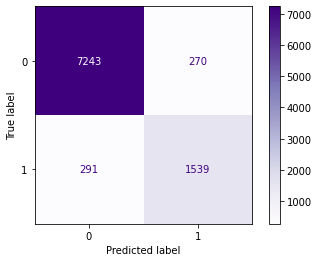

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap='Purples')

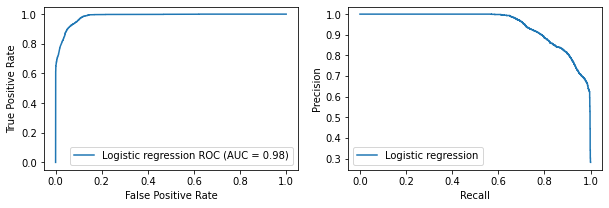

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression ROC')
disp.plot(ax=ax1)

precision, recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='Logistic regression')
disp.plot(ax=ax2)

kNN machine learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_knn = df.dropna()
y_knn = df["No-show"]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df[features], y, stratify=y,test_size=0.4)

# Choose the number of nearest neighbors and the metric
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = knn.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9169966820079204


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


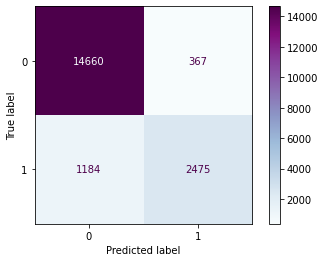

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.BuPu)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert the labels to a numeric representation
le = LabelEncoder()
y_test = le.fit_transform(y_test)
predictions = le.transform(predictions)


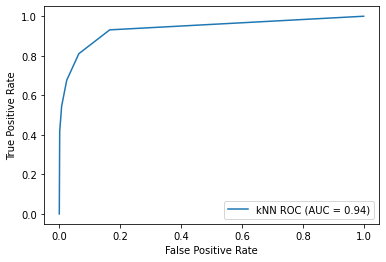

In [ ]:
#kNN ROC curve updated by Nisa
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='kNN ROC')
disp.plot()

Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.dropna()
# Split the data into features and target


y = df["NoShow"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, stratify=y,test_size=0.4)

# Create a logistic regression model
model_rf = RandomForestClassifier(random_state=0)


# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_rf.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

y_score = model_rf.predict_proba(X_test)[:, 1]
auprc = average_precision_score(y_test, y_score)
auprc

0.931473918240311

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


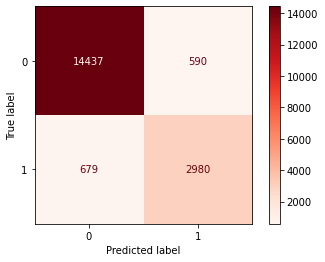

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_rf, X_test, y_test, cmap='Reds')

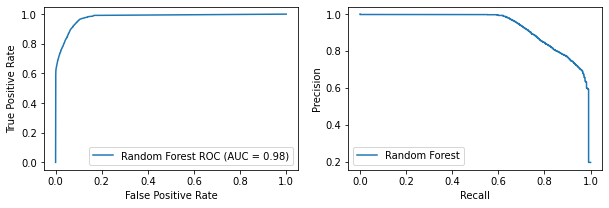

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest ROC')
disp.plot(ax=ax1)

precision, recall, thresholds = precision_recall_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='Random Forest')
disp.plot(ax=ax2)

In [ ]:
n_estimators = [50,100,300,500]
max_features = [5,7,10,25]
#RF ---

print("Random Forest:")
print()

best_auprc = 0
best_n = 0
n_auprc = []

for n in n_estimators:
  model_rf = RandomForestClassifier(n_estimators=n, random_state=0)
  model_rf.fit(X_train, y_train)

  preds = model_rf.predict(X_test)
  auprc = average_precision_score(y_test, preds)
  print("n_estimators", n, ", AUPRC score: ", auprc)
  n_auprc.append(auprc)
  if auprc > best_auprc:
    best_auprc = auprc
    best_n = n

print()
print("Best n_estimators for Random Forest =", best_n )
print()

best_auprc = 0
best_m = 0
m_auprc = []

for m in max_features:
    model_rf = RandomForestClassifier(n_estimators=best_n, max_depth=m, random_state=0)
    model_rf.fit(X_train, y_train)

    preds = model_rf.predict(X_test)
    auprc = average_precision_score(y_test, preds)
    print("n_estimators", best_n, "max_features", m, ", AUPRC score: ", auprc)
    m_auprc.append(auprc)
    if auprc > best_auprc:
      best_auprc = auprc
      best_m = m

print()
print("For Random Forest, best n_estimators =", best_n, "and best max_features =", best_m)
print()

Random Forest:

n_estimators 50 , AUPRC score:  0.7121043308565961
n_estimators 100 , AUPRC score:  0.7161698335250403
n_estimators 300 , AUPRC score:  0.7147946027512839
n_estimators 500 , AUPRC score:  0.715130303139368

Best n_estimators for Random Forest = 100

n_estimators 100 max_features 5 , AUPRC score:  0.7598888073002601
n_estimators 100 max_features 7 , AUPRC score:  0.7583014165216904
n_estimators 100 max_features 10 , AUPRC score:  0.7544038247301932
n_estimators 100 max_features 25 , AUPRC score:  0.7160014662047279

For Random Forest, best n_estimators = 100 and best max_features = 5



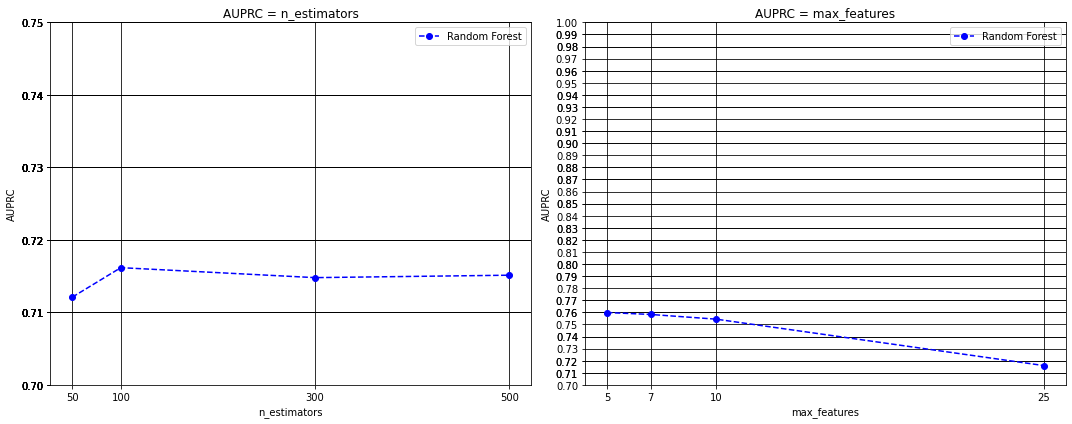

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6))



x = [50,100,300,500]
y1 = [n_auprc[0], n_auprc[1], n_auprc[2], n_auprc[3]]

ax[0].plot(x, y1, label = "Random Forest", color = "blue",  marker="o",linestyle='dashed')
ax[0].set_yticks(np.around(np.linspace(0.7,0.75),decimals=2))
ax[0].set_xticks(x)
ax[0].legend()
ax[0].set_title('AUPRC = n_estimators')
ax[0].set_ylabel('AUPRC')
ax[0].set_xlabel('n_estimators')
ax[0].grid(color="black")


X = [5,7,10,25]
Y1 = [m_auprc[0], m_auprc[1], m_auprc[2], m_auprc[3]]

ax[1].plot(X, Y1, label = "Random Forest", color = "blue",  marker="o",linestyle='dashed')
ax[1].set_yticks(np.around(np.linspace(0.7,1),decimals=2))
ax[1].set_xticks(X)
ax[1].legend()
ax[1].set_title('AUPRC = max_features')
ax[1].set_ylabel('AUPRC')
ax[1].set_xlabel('max_features')
ax[1].grid(color="black")

fig.tight_layout()

Multinomial Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data into train, validation, and test
X = df[features]
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

print(f'train: {X_train.shape}')
print(f'val: {X_val.shape}')
print(f'test: {X_test.shape}')

train: (28028, 9)
val: (9343, 9)
test: (9343, 9)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# building the model
nb_model = MultinomialNB()

# fitting the model with the training data
nb_model.fit(X_train, y_train)

MultinomialNB()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


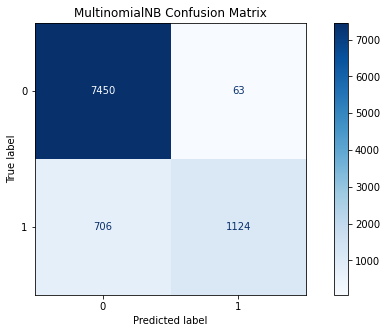

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(10, 5))

# the confusion matrix for the Random Forest model
plot_confusion_matrix(nb_model, X_val, y_val, ax=ax, cmap='Blues')
ax.set_title('MultinomialNB Confusion Matrix')

plt.show()

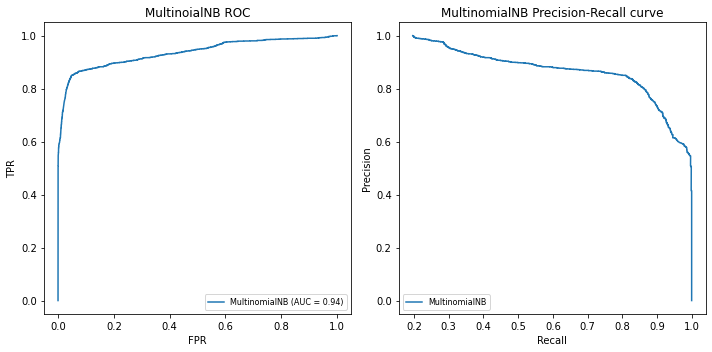

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve, roc_auc_score

nb_y_pred_proba = nb_model.predict_proba(X_val)[:, 1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_val, nb_y_pred_proba) # calculating false positive and true positive rates
nb_precision, nb_recall, nb_thresholds = precision_recall_curve(y_val, nb_y_pred_proba) # calculating precision and recall values
nb_auc = roc_auc_score(y_val, nb_y_pred_proba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(nb_fpr, nb_tpr, label='MultinomialNB (AUC = {:.2f})'.format(nb_auc))
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.set_title('MultinoialNB ROC')
ax1.legend(loc='lower right', fontsize=8)

ax2.plot(nb_precision, nb_recall, label='MultinomialNB')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('MultinomialNB Precision-Recall curve')
ax2.legend(loc='lower left', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter Tuning Results

from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

# merging the train and validation dataframes
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

alpha_range = [0.001, 0.01, 0.1, 1, 10] # alpha is the parameter for MultinomialNB

scores = []
for alpha in alpha_range:
  model = MultinomialNB(alpha=alpha)
  score = cross_val_score(model, X, y, cv=5).mean() #accuracy
  scores.append(score)
  print(f"alpha value: {alpha}, score: {score}")

best_alpha = alpha_range[scores.index(max(scores))]
print(f"\nthe best alpha value: {best_alpha}")
print(f"the best score: {max(scores)}")

alpha value: 0.001, score: 0.9182787008340172
alpha value: 0.01, score: 0.9182787008340172
alpha value: 0.1, score: 0.9182787008340172
alpha value: 1, score: 0.9182787008340172
alpha value: 10, score: 0.918439250270503

the best alpha value: 10
the best score: 0.918439250270503


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
nb_model = MultinomialNB()
nb_model.fit(X, y)

y_pred = nb_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f'f1: {f1:.3f}')
print(f'acc: {auprc:.3f}')

f1: 0.752
acc: 0.716


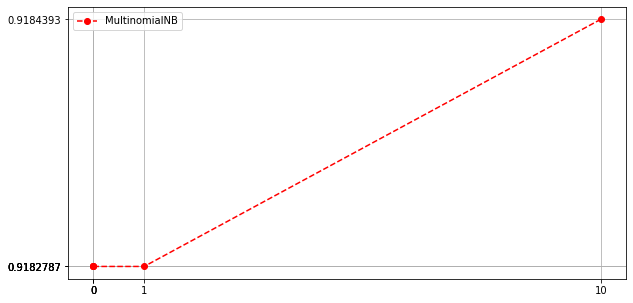

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax1.set_title("score - alpha value")
ax1.set_xlabel("alpha value")
ax1.set_ylabel("score")

# loop for alpha vlaues and scores
alpha_range = [int(x) for x in alpha_range]
ax.plot(alpha_range, scores, color='red', linestyle='dashed',marker='o', label = "MultinomialNB")

ax.set_xticks(alpha_range)
ax.set_yticks(scores)
ax.grid()
ax.legend()

plt.show()

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
df = df.dropna()

y = df['NoShow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, stratify=y,test_size=0.4)

#building gradient boosting model
model_gb = GradientBoostingClassifier(random_state=0)
#fitting the model with training data
model_gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

0.9490296605867212

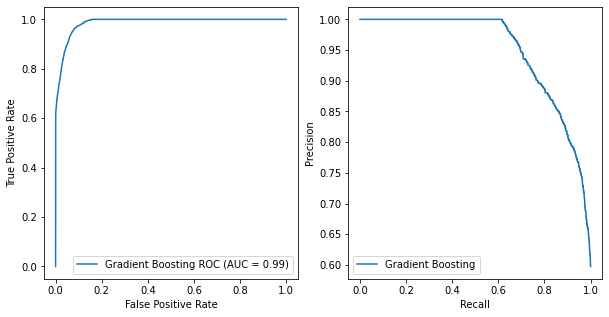

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fpr, tpr, thresholds = roc_curve(y_test, model_gb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosting ROC')
disp.plot(ax=ax1)

precision, recall, thresholds = precision_recall_curve(y_test, model_gb.predict_proba(X_test)[:, 1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='Gradient Boosting')
disp.plot(ax=ax2)

y_score = model_gb.predict_proba(X_test)[:, 1]
auprc = average_precision_score(y_test, y_score)
auprc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


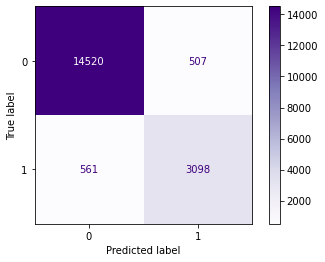

In [ ]:
plot_confusion_matrix(model_gb, X_test, y_test, cmap='Purples')